## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.448459 -1.020418  0.789148 -1.202085 -0.087868 -0.664467
1 -1.739388 -0.681269  0.989563  0.471235 -1.168287 -1.228627
2  0.534714 -0.414684 -0.371200  0.344067 -0.365987  0.280912
3 -1.512842 -0.816530 -1.477877  1.669377 -0.145787  0.405410
4 -0.947261 -0.656376  0.729531  1.492044  0.681045  0.333487


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9600561	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9514576	total: 70.1ms	remaining: 35s
2:	learn: 0.9412709	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9312728	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9194443	total: 72ms	remaining: 14.3s
5:	learn: 0.9093585	total: 72.6ms	remaining: 12s
6:	learn: 0.8998135	total: 73ms	remaining: 10.4s
7:	learn: 0.8900042	total: 73.7ms	remaining: 9.13s
8:	learn: 0.8812792	total: 74.1ms	remaining: 8.16s
9:	learn: 0.8726805	total: 74.7ms	remaining: 7.39s
10:	learn: 0.8634826	total: 75.2ms	remaining: 6.76s
11:	learn: 0.8544356	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8453001	total: 76.1ms	remaining: 5.78s
13:	learn: 0.8364259	total: 76.5ms	remaining: 5.39s
14:	learn: 0.8299394	total: 77ms	remaining: 5.05s
15:	learn: 0.8227792	total: 77.5ms	remaining: 4.77s
16:	learn: 0.8143894	total: 78.1ms	remaining: 4.51s
17:	learn: 0.8063786	total: 79.4ms	remaining: 4.33s
18:	learn: 0.7989355	total: 80ms	remaining: 4.13s
19:	

80:	learn: 0.4552962	total: 109ms	remaining: 1.23s
81:	learn: 0.4514194	total: 109ms	remaining: 1.22s
82:	learn: 0.4480239	total: 110ms	remaining: 1.21s
83:	learn: 0.4443956	total: 110ms	remaining: 1.2s
84:	learn: 0.4402356	total: 111ms	remaining: 1.19s
85:	learn: 0.4364793	total: 111ms	remaining: 1.18s
86:	learn: 0.4334467	total: 111ms	remaining: 1.17s
87:	learn: 0.4301229	total: 112ms	remaining: 1.16s
88:	learn: 0.4257307	total: 112ms	remaining: 1.15s
89:	learn: 0.4224855	total: 113ms	remaining: 1.14s
90:	learn: 0.4195141	total: 113ms	remaining: 1.13s
91:	learn: 0.4160819	total: 114ms	remaining: 1.12s
92:	learn: 0.4131011	total: 114ms	remaining: 1.11s
93:	learn: 0.4097488	total: 115ms	remaining: 1.1s
94:	learn: 0.4074122	total: 115ms	remaining: 1.1s
95:	learn: 0.4043731	total: 116ms	remaining: 1.09s
96:	learn: 0.4010512	total: 116ms	remaining: 1.08s
97:	learn: 0.3977559	total: 117ms	remaining: 1.07s
98:	learn: 0.3946100	total: 117ms	remaining: 1.06s
99:	learn: 0.3913042	total: 117ms	

245:	learn: 0.1408581	total: 187ms	remaining: 575ms
246:	learn: 0.1398062	total: 188ms	remaining: 573ms
247:	learn: 0.1388198	total: 188ms	remaining: 571ms
248:	learn: 0.1377869	total: 189ms	remaining: 569ms
249:	learn: 0.1369044	total: 189ms	remaining: 567ms
250:	learn: 0.1358630	total: 190ms	remaining: 566ms
251:	learn: 0.1349611	total: 190ms	remaining: 564ms
252:	learn: 0.1342131	total: 190ms	remaining: 562ms
253:	learn: 0.1335165	total: 191ms	remaining: 560ms
254:	learn: 0.1326915	total: 191ms	remaining: 559ms
255:	learn: 0.1316143	total: 192ms	remaining: 557ms
256:	learn: 0.1308498	total: 192ms	remaining: 556ms
257:	learn: 0.1300301	total: 193ms	remaining: 555ms
258:	learn: 0.1292993	total: 193ms	remaining: 553ms
259:	learn: 0.1284529	total: 194ms	remaining: 552ms
260:	learn: 0.1277660	total: 194ms	remaining: 550ms
261:	learn: 0.1271099	total: 195ms	remaining: 548ms
262:	learn: 0.1262925	total: 195ms	remaining: 547ms
263:	learn: 0.1252474	total: 196ms	remaining: 546ms
264:	learn: 

462:	learn: 0.0479796	total: 293ms	remaining: 339ms
463:	learn: 0.0478917	total: 293ms	remaining: 338ms
464:	learn: 0.0478279	total: 293ms	remaining: 338ms
465:	learn: 0.0477418	total: 294ms	remaining: 337ms
466:	learn: 0.0475455	total: 294ms	remaining: 336ms
467:	learn: 0.0473318	total: 295ms	remaining: 335ms
468:	learn: 0.0472698	total: 295ms	remaining: 334ms
469:	learn: 0.0471866	total: 296ms	remaining: 333ms
470:	learn: 0.0471259	total: 296ms	remaining: 333ms
471:	learn: 0.0470444	total: 297ms	remaining: 332ms
472:	learn: 0.0468532	total: 297ms	remaining: 331ms
473:	learn: 0.0467731	total: 298ms	remaining: 330ms
474:	learn: 0.0465849	total: 298ms	remaining: 329ms
475:	learn: 0.0465061	total: 299ms	remaining: 329ms
476:	learn: 0.0463208	total: 300ms	remaining: 329ms
477:	learn: 0.0460609	total: 300ms	remaining: 328ms
478:	learn: 0.0458509	total: 301ms	remaining: 327ms
479:	learn: 0.0456372	total: 301ms	remaining: 327ms
480:	learn: 0.0454324	total: 302ms	remaining: 326ms
481:	learn: 

629:	learn: 0.0273313	total: 371ms	remaining: 218ms
630:	learn: 0.0272492	total: 372ms	remaining: 217ms
631:	learn: 0.0271613	total: 372ms	remaining: 217ms
632:	learn: 0.0271257	total: 373ms	remaining: 216ms
633:	learn: 0.0270450	total: 373ms	remaining: 215ms
634:	learn: 0.0270100	total: 374ms	remaining: 215ms
635:	learn: 0.0269198	total: 374ms	remaining: 214ms
636:	learn: 0.0268853	total: 374ms	remaining: 213ms
637:	learn: 0.0267671	total: 375ms	remaining: 213ms
638:	learn: 0.0266891	total: 375ms	remaining: 212ms
639:	learn: 0.0266044	total: 376ms	remaining: 211ms
640:	learn: 0.0265276	total: 376ms	remaining: 211ms
641:	learn: 0.0264627	total: 377ms	remaining: 210ms
642:	learn: 0.0263990	total: 378ms	remaining: 210ms
643:	learn: 0.0263236	total: 378ms	remaining: 209ms
644:	learn: 0.0262817	total: 378ms	remaining: 208ms
645:	learn: 0.0261953	total: 379ms	remaining: 208ms
646:	learn: 0.0261214	total: 379ms	remaining: 207ms
647:	learn: 0.0260597	total: 380ms	remaining: 206ms
648:	learn: 

851:	learn: 0.0141500	total: 476ms	remaining: 82.7ms
852:	learn: 0.0140978	total: 476ms	remaining: 82.1ms
853:	learn: 0.0140751	total: 477ms	remaining: 81.5ms
854:	learn: 0.0140525	total: 477ms	remaining: 80.9ms
855:	learn: 0.0140070	total: 478ms	remaining: 80.4ms
856:	learn: 0.0139710	total: 478ms	remaining: 79.8ms
857:	learn: 0.0139183	total: 479ms	remaining: 79.2ms
858:	learn: 0.0138830	total: 479ms	remaining: 78.7ms
859:	learn: 0.0138237	total: 480ms	remaining: 78.1ms
860:	learn: 0.0137841	total: 480ms	remaining: 77.5ms
861:	learn: 0.0137485	total: 481ms	remaining: 77ms
862:	learn: 0.0137045	total: 481ms	remaining: 76.4ms
863:	learn: 0.0136702	total: 482ms	remaining: 75.8ms
864:	learn: 0.0136403	total: 482ms	remaining: 75.3ms
865:	learn: 0.0136090	total: 483ms	remaining: 74.7ms
866:	learn: 0.0135575	total: 483ms	remaining: 74.1ms
867:	learn: 0.0135104	total: 483ms	remaining: 73.5ms
868:	learn: 0.0134725	total: 485ms	remaining: 73.1ms
869:	learn: 0.0134299	total: 485ms	remaining: 72

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

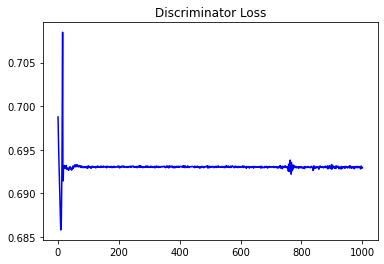

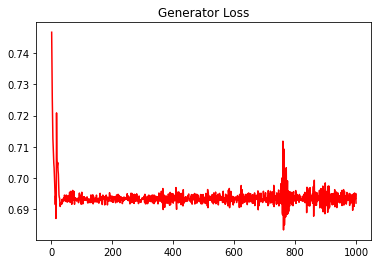

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09786368114031016


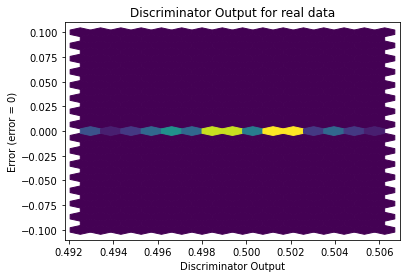

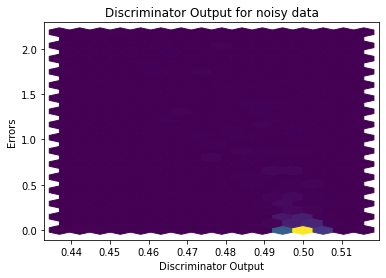

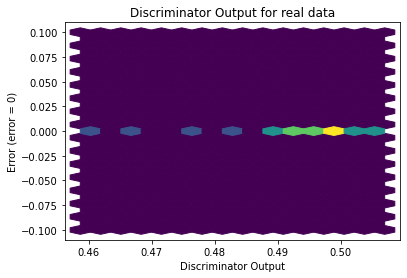

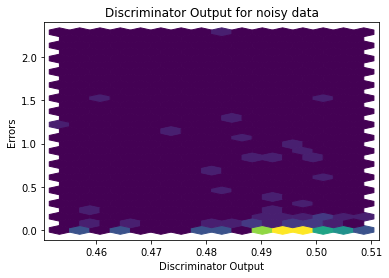

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


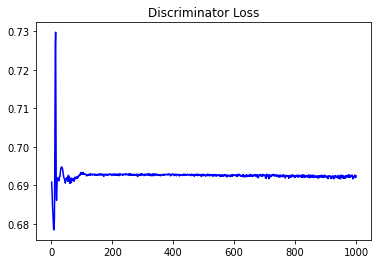

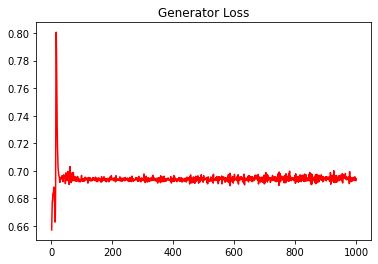

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09834991698626706


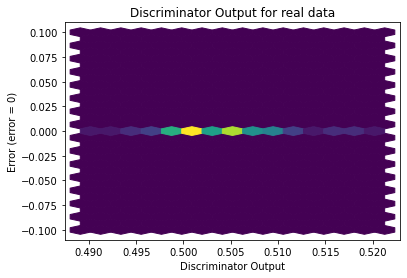

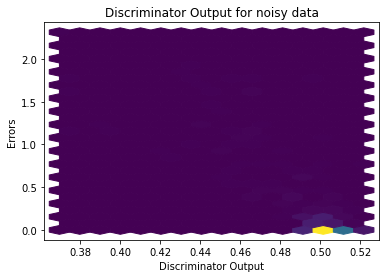

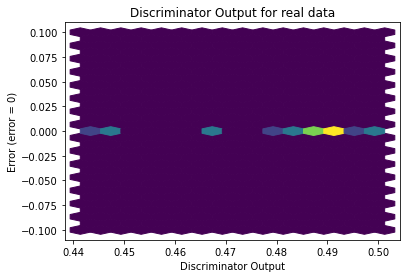

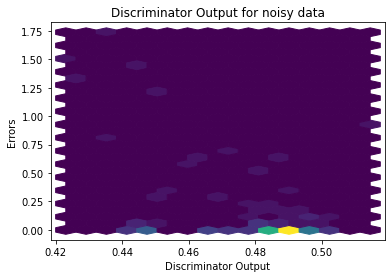

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8077]], requires_grad=True)
